# Lab: Linear Programming

Lab associated with Module 9: Linear Programming

***

In [50]:
# The following lines are used to increase the width of cells to utilize more space on the screen 
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

***

### Section 0: Imports

In [51]:
import numpy as np

In [52]:
import matplotlib.pyplot as plt

In [53]:
from scipy.optimize import linprog

***

### Section 1: Solving LP problem graphically

Let us see if we can solve the LP problem that we discussed in the lecture, graphically

In [54]:
X1 = np.linspace(0, 1000)

In [55]:
# X1 + X2 >= 200
# X2 = 200 - X1
X2 = 200 - X1

In [56]:
#2X1 + 3X2 <= 120
#X2 = (120 - 2X1)/2

In [57]:
X2x = X1[np.where(X2 > 0)[0]]
X2y = X2[np.where(X2 > 0)[0]]

In [58]:
# 9X1 + 6X2 <= 1556
# X2 = (1556 - 9X1)/6

X3 = (1556 - 9*X1)/6

X3x = X1[np.where(X3 > 0)[0]]
X3y = X3[np.where(X3 > 0)[0]]

In [59]:
# 12X1 + 16X2 <= 2880
# X2 = (2880 - 12X1)/16

X4 = (2880 - 12*X1)/16

X4x = X1[np.where(X4 > 0)[0]]
X4y = X4[np.where(X4 > 0)[0]]

Let us plot these constraints

Text(0, 0.5, 'X2')

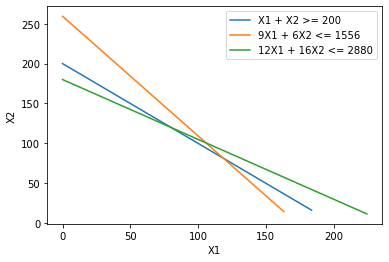

In [60]:
plt.plot(X2x, X2y, label=r'$2y\leq25-x$')
plt.plot(X3x, X3y, label=r'$2y\leq25-x$')
plt.plot(X4x, X4y, label=r'$2y\leq25-x$')

plt.legend(['X1 + X2 >= 200', '9X1 + 6X2 <= 1556', '12X1 + 16X2 <= 2880'])
plt.xlabel('X1')
plt.ylabel('X2')

Let us see if we can plot the feasible region

Text(0, 0.5, 'X2')

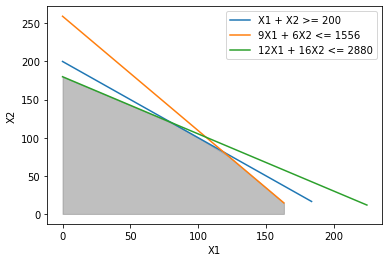

In [61]:
plt.plot(X2x, X2y, label=r'$2y\leq25-x$')
plt.plot(X3x, X3y, label=r'$2y\leq25-x$')
plt.plot(X4x, X4y, label=r'$2y\leq25-x$')

# Fill feasible region
y5 = np.minimum(X2y[0:9], X3y)
y6 = np.minimum(y5, X4y[0:9])
plt.fill_between(X4x[0:9], y6, color='grey', alpha=0.5)

plt.legend(['X1 + X2 >= 200', '9X1 + 6X2 <= 1556', '12X1 + 16X2 <= 2880'])
plt.xlabel('X1')
plt.ylabel('X2')

Okay, now we have the constraints, let us see if we can plot the various values of objective function

Text(0, 0.5, 'X2')

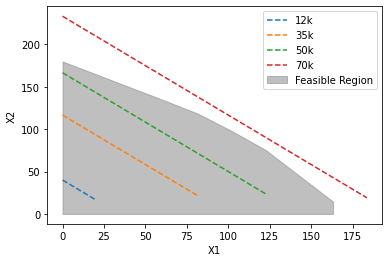

In [62]:
# 350X1 + 300X2
# X2 = (N - 350X1)/300
N1 = 12000
N2 = 35000
N3 = 50000
N4 = 70000

X5_1 = (N1 - 350*X1)/300
X5_2 = (N2 - 350*X1)/300
X5_3 = (N3 - 350*X1)/300
X5_4 = (N4 - 350*X1)/300

# Fill feasible region
y5 = np.minimum(X2y[0:9], X3y)
y6 = np.minimum(y5, X4y[0:9])
plt.fill_between(X4x[0:9], y6, color='grey', alpha=0.5)

# No need to plot the constraints

#plt.plot(X2x, X2y, label=r'$2y\leq25-x$')
#plt.plot(X3x, X3y, label=r'$2y\leq25-x$')
#plt.plot(X4x, X4y, label=r'$2y\leq25-x$')

X5_1x = X1[np.where(X5_1 > 0)[0]]
X5_1y = X5_1[np.where(X5_1 > 0)[0]]

X5_2x = X1[np.where(X5_2 > 0)[0]]
X5_2y = X5_2[np.where(X5_2 > 0)[0]]

X5_3x = X1[np.where(X5_3 > 0)[0]]
X5_3y = X5_3[np.where(X5_3 > 0)[0]]

X5_4x = X1[np.where(X5_4 > 0)[0]]
X5_4y = X5_4[np.where(X5_4 > 0)[0]]

plt.plot(X5_1x, X5_1y, '--', label=r'$2y\leq25-x$')
plt.plot(X5_2x, X5_2y, '--', label=r'$2y\leq25-x$')
plt.plot(X5_3x, X5_3y, '--', label=r'$2y\leq25-x$')
plt.plot(X5_4x, X5_4y, '--', label=r'$2y\leq25-x$')

plt.legend(['12k', '35k', '50k', '70k','Feasible Region'])
plt.xlabel('X1')
plt.ylabel('X2')

### <font color='red'> Activity 1: Write code for solving a system of linear equations in form of y = Ax. Note, you should use LU decomposition algorithm that we discussed in the lecture, and then use forward and backward substitution to find a value of x. </font>

In [63]:
# what is expected: y = Ax
# y - Given, Vector (1d) [1, 2, 3, 4]
# A - Given, Matrix (2d) [[2, 3, 1 9],[1, 2, 3, 1],[0, 1, 2 ,3],[4, 1, 6, 6]]
# x - Not Given, Vector (1d) [x1, x2, x3, x4]

def sovleSystemLinearEquations(A, y):
    
    # A = LU
    L, U = LUDecomposition(A)
    
    # y = Ax -> y = LUx
    # Ux = b
    # y = Lb (y is known, L is known, but b is not known)
    
    b = forwardSub(L, y)
    
    # b = Ux (b is known, U is known, x is not known)
    x = backwardSub(U, b)
    
    return x


def LUDecomposition(A):
    
    n = len(A)
    L = np.zeros((n, n))
    U = np.zeros((n, n))
    
    # Doolittle's algorithm
    for i in range(n):
        # Upper triangular matrix
        for k in range(i, n):
            s = 0
            for j in range(i):
                s += L[i][j] * U[j][k]
            U[i][k] = A[i][k] - s
        
        # Lower triangular matrix (with 1's on the diagonal)
        for k in range(i, n):
            if i == k:
                L[i][i] = 1
            else:
                s = 0
                for j in range(i):
                    s += L[k][j] * U[j][i]
                L[k][i] = (A[k][i] - s) / U[i][i]
    
    return L, U
    
#def forwardSub(L, a):
    
#    return b
# We first solve Ly = b then we solve Ux = b
# Because y = Ax => A = LU
# so y = LUx
def forwardSub(L, b):
    
    n = len(b)
    y = np.zeros(n)
    
    for i in range(n):
        s = 0
        for j in range(i):
            s += L[i][j] * y[j]
        y[i] = (b[i] - s) / L[i][i]
    
    return y

def backwardSub(U, y):

    n = len(y)
    x = np.zeros(n)
    
    for i in range(n-1, -1, -1):
        s = 0
        for j in range(i+1, n):
            s += U[i][j] * x[j]
        x[i] = (y[i] - s) / U[i][i]
    
    return x


### <font color='green'> Rough work for activity 1. </font>

In [64]:
# LU Decompostion Pseudo-code

n = 4
#A = [[0 for i in range(0,n)] for i in range(0, n)]
A = [[2, 3, 1, 5], [6, 13, 5, 19], [2, 19, 10, 23], [4, 10, 11, 31]]
L = [[0 for i in range(0,n)] for i in range(0, n)] # Take care of initialization of L
U = [[0 for i in range(0,n)] for i in range(0, n)]

for k in range(0, n):
    
    U[k][k] = A[k][k]
    
    for i in range(k+1, n):
        L[i][k] = A[i][k] / U[k][k]


In [65]:
L

[[0, 0, 0, 0],
 [3.0, 0, 0, 0],
 [1.0, 1.4615384615384615, 0, 0],
 [2.0, 0.7692307692307693, 1.1, 0]]

In [66]:
if __name__ == "__main__":
    
    A = np.array([[2, 3, 1, 5], 
                  [6, 13, 5, 19], 
                  [2, 19, 10, 23], 
                  [4, 10, 11, 31]], dtype=float)
    
    y = np.array([10, 43, 54, 56], dtype=float)
    
    # Solve the system
    x = sovleSystemLinearEquations(A, y)
    
    print("Solution x:", x)
    print("Verification (Ax should equal y):", np.dot(A, x))

Solution x: [-41.375        7.25       -60.66666667  26.33333333]
Verification (Ax should equal y): [10. 43. 54. 56.]


In [67]:
# Forward Substitution (Strategy)
# La = b

L = [[1,    0,   0,  0]
     [l11,  1,   0,  0]
     [l21, l22,  1,  0]
     [l31, l32, l33, 1]]

a = [a1, a2, a3, a4] # Not Given

b = [b1, b2, b3, b4] # Given

# First case
1* a1 = b1
a1 = b1

# Second case

l11 * a1 + 1 * a2 = b2
a2 = b2 - (l11 * a1)

# Third case

l21 * a1 + l22 * a2 + 1 * a3 = b3 
a3 = b3 - (l21 * a1 + l22 * a2)

# Fourt case
l31 * a1 + l32 * a2 + l33 * a3 + 1 * a4 = b4
a4 = b4 - (l31 * a1 + l32 * a2 + l33 * a3)






SyntaxError: cannot assign to operator (<ipython-input-67-e68a1e31ed00>, line 14)

In [68]:
def ForwardSub(L, b):
    
    n = len(b)
    
    a = [0 for i in range(0, n)]
    
    for i in range(0, n):
        a[i] = b[i] - np.dot(a, L[i])
        
    return a

In [69]:
# backward Substitution

    for i in range(n-1, -1, 0):
        a[i] = (b[i] - np.dot(a, U[i]))/U[i][i]

IndentationError: unexpected indent (<ipython-input-69-2d0b5d6769b5>, line 3)

In [70]:
A = np.array([1, 2, 3, 4])
B = np.array([2, 3, 4, 5])

1 * 2 + 2 * 3 + 3 * 4 + 4 * 5

np.dot(A, B)

A.dot(B)

40

In [71]:
np.dot(A, B)

40

In [72]:
A.dot(B)

40

# Task 3

Corner point (0.00, 0.00): Z = 0.00
Corner point (0.00, 14.00): Z = 42.00
Corner point (8.00, 0.00): Z = 40.00
Corner point (6.00, 6.00): Z = 48.00
Corner point (3.00, 12.00): Z = 51.00

Optimal solution: X1 = 3.00, X2 = 12.00
Optimal value: Z = 51.00


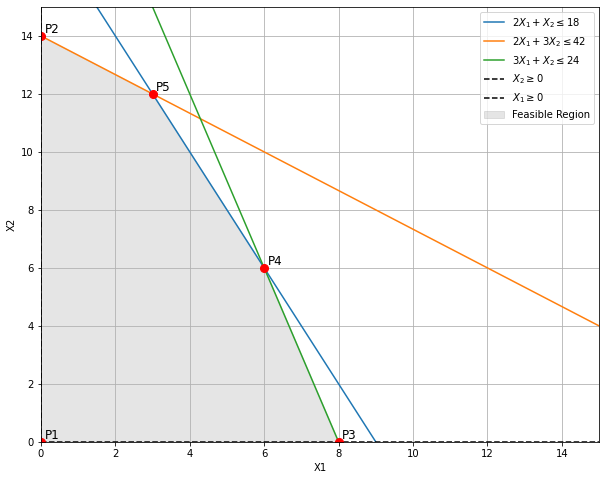

In [73]:
# Define the constraints
x1 = np.linspace(0, 25, 400)

# Constraint 1: 2X1 + X2 ≤ 18
x2_1 = 18 - 2*x1

# Constraint 2: 2X1 + 3X2 ≤ 42
x2_2 = (42 - 2*x1) / 3

# Constraint 3: 3X1 + X2 ≤ 24
x2_3 = 24 - 3*x1

# Non-negativity constraints
x2_4 = np.zeros_like(x1)

# Plot the constraints
plt.figure(figsize=(10, 8))
plt.plot(x1, x2_1, label=r'$2X_1 + X_2 \leq 18$')
plt.plot(x1, x2_2, label=r'$2X_1 + 3X_2 \leq 42$')
plt.plot(x1, x2_3, label=r'$3X_1 + X_2 \leq 24$')
plt.axhline(0, color='black', linestyle='--', label=r'$X_2 \geq 0$')
plt.axvline(0, color='black', linestyle='--', label=r'$X_1 \geq 0$')

# Corner 1: Intersection of X1=0 and X2=0
corner1 = (0, 0)

# Corner 2: Intersection of X1=0 and 2X1 + 3X2 = 42
corner2 = (0, 14)

# Corner 3: Intersection of X2=0 and 3X1 + X2 = 24
corner3 = (8, 0)

# Corner 4: Intersection of 2X1 + X2 = 18 and 3X1 + X2 = 24
# Solve: 2x1 + x2 = 18 and 3x1 + x2 = 24
# Subtract first from second: x1 = 6, then x2 = 6
corner4 = (6, 6)

# Corner 5: Intersection of 2X1 + 3X2 = 42 and 3X1 + X2 = 24
# Solve: 2x1 + 3x2 = 42 and 3x1 + x2 = 24
# From second: x2 = 24 - 3x1
# Substitute: 2x1 + 3(24 - 3x1) = 42 => 2x1 + 72 - 9x1 = 42 => -7x1 = -30 => x1 ≈ 4.2857
# Then x2 = 24 - 3*4.2857 ≈ 11.1429
corner5 = (30/7, 24 - 3*(30/7))

# Corner 6: Intersection of 2X1 + X2 = 18 and 2X1 + 3X2 = 42
# Solve: 2x1 + x2 = 18 and 2x1 + 3x2 = 42
# Subtract first from second: 2x2 = 24 => x2 = 12, then x1 = 3
corner6 = (3, 12)

# Filter feasible corners (non-negative and satisfy all constraints)
corners = [corner1, corner2, corner3, corner4, corner5, corner6]
feasible_corners = []

for corner in corners:
    x1_val, x2_val = corner
    if (x1_val >= 0 and x2_val >= 0 and 
        2*x1_val + x2_val <= 18 and 
        2*x1_val + 3*x2_val <= 42 and 
        3*x1_val + x2_val <= 24):
        feasible_corners.append(corner)

# Calculate objective function values at each corner
objective_values = []
for corner in feasible_corners:
    x1_val, x2_val = corner
    z = 5*x1_val + 3*x2_val
    objective_values.append(z)
    print(f"Corner point ({x1_val:.2f}, {x2_val:.2f}): Z = {z:.2f}")

# Find the optimal solution
optimal_index = np.argmax(objective_values)
optimal_solution = feasible_corners[optimal_index]
optimal_value = objective_values[optimal_index]

print(f"\nOptimal solution: X1 = {optimal_solution[0]:.2f}, X2 = {optimal_solution[1]:.2f}")
print(f"Optimal value: Z = {optimal_value:.2f}")

# Plot the feasible region
x1_feasible = np.linspace(0, 8, 100)
x2_feasible = np.minimum(np.minimum(18 - 2*x1_feasible, (42 - 2*x1_feasible)/3), 24 - 3*x1_feasible)
plt.fill_between(x1_feasible, 0, x2_feasible, alpha=0.2, color='gray', label='Feasible Region')

# Plot corner points
for i, corner in enumerate(feasible_corners):
    plt.plot(corner[0], corner[1], 'ro', markersize=8)
    plt.text(corner[0]+0.1, corner[1]+0.1, f'P{i+1}', fontsize=12)

plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.grid(True)
plt.xlim(0, 15)
plt.ylim(0, 15)
plt.show()

# Task 4

In [74]:
# 2X1 + X2 ≤ 40 (machine hours constraint)
# X1, X2 ≥ 0 

# Coefficients for objective function (to be minimized)
c = [-40, -30]  # Negative because we want to maximize

# Inequality constraints (left-hand side coefficients)
A = [[2, 1]]

# Inequality constraints (right-hand side)
b = [40]

# Bounds for variables
x_bounds = (0, None)
y_bounds = (0, None)

# Solve the LP problem
result = linprog(c, A_ub=A, b_ub=b, bounds=[x_bounds, y_bounds], method='highs')

# Extract and interpret the solution
if result.success:
    x1_opt = result.x[0]
    x2_opt = result.x[1]
    max_profit = -result.fun  # Convert back to maximization
    
    print("Optimal production plan:")
    print(f"Product A: {x1_opt:.2f} units")
    print(f"Product B: {x2_opt:.2f} units")
    print(f"Maximum profit: ${max_profit:.2f}")
    
    # Check constraint utilization
    machine_hours_used = 2*x1_opt + x2_opt
    print(f"Machine hours used: {machine_hours_used:.2f} out of 40 available")
else:
    print("No solution found:", result.message)

Optimal production plan:
Product A: 0.00 units
Product B: 40.00 units
Maximum profit: $1200.00
Machine hours used: 40.00 out of 40 available


***